In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
# path = '/mnt/home/polymathic/ceph/the_well/testing_before_adding/clawpack_data/euler2d_quadrants_gamma1.13_C3H8_16.0_extrap/seed1/output_numpy/data.hdf5'
boundaries = {'extrap': 100, 'periodic': 1000}
gases = {
    1.13: 'C3H8_16.0',
    # 1.195: 'CO2_1000.0',
    1.22: 'C2H6_15.0',
    # 1.235: 'CO2_400.0',
    # 1.281: 'CO2_100.0',
    1.3: 'CO2_20.0',
    # 1.31: 'H2O_200.0/CO2_0.0/N2O_20.0/NH3_15.0/SO2_15.0',
    # 1.318: 'H2_2000.0',
    # 1.32: 'CH4_20.0',
    # 1.324: 'H2O_100.0',
    1.33: 'H2O_20.0',
    # 1.34: 'Cl2_20.0',
    # 1.35: 'CH4_-74.0',
    # 1.358: 'H2_1000.0',
    1.365: 'Dry_air_1000.0',
    # 1.387: 'H2_400.0',
    # 1.393: 'Dry air_400.0',
    # 1.397: 'O2_200.0',
    # 1.398: 'Dry air_200.0',
    # 1.399: 'O2_100.0',
    1.4: 'Dry_air_20.0',
    # 1.403: 'Dry air_0.0',
    1.404: 'H2_100.0_Dry_air_-15.0',
    # 1.41: 'CH4_-115.0',
    # 1.415: 'O2_-76.0',
    # 1.45: 'O2_-181.0',
    1.453: 'H2_-76.0',
    # 1.47: 'N2_-181.0',
    1.597: 'H2_-181.0',
    # 1.64: 'Ne_19.0/Xe_19.0',
    # 1.66: 'He_20.0',
    # 1.67: 'Ar_20.0/Hg_360.0',
    # 1.68: 'Kr_19.0',
    1.76: 'Ar_-180.0'
}

gas name: Dry_air_20.0
boundary condition: periodic
random seed number: 252
time: 21


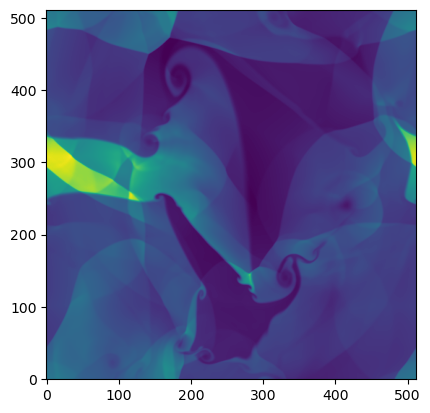

In [8]:
gas_index = 5 #np.random.randint(0, len(gases))
bc_random = 1 #np.random.randint(0, 2)
bc = list(boundaries.keys())[bc_random]
gas_name = gases[list(gases.keys())[gas_index]]
gas_value = list(gases.keys())[gas_index]
file_suffix = f'gamma{gas_value}_{gas_name}_{bc}.hdf5'
path = 'data/' + file_suffix

i = np.random.randint(0, 500)

with h5py.File(path, 'r') as file:
    energy = file['energy'][i]
    momentum_x = file['momentum_x'][i]
    momentum_y = file['momentum_y'][i]
    density = file['density'][i]
    pressure = file['pressure'][i]

print('gas name:', gas_name)
print('boundary condition:', bc)
print('random seed number:' , i)
t = np.random.randint(0, 100)
print('time:', t)
plt.imshow(density[t], origin='lower');

In [4]:
#Create the Gif
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))
# from utils import create_gif

# create_gif(density, saving_directory='/mnt/home/polymathic/ceph/the_well/2D/euler_quadrants', name_file='density', delete_imgs=False)

In [9]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tqdm import tqdm
def create_gif(time_series, saving_directory, name_file = 'concentration', delete_imgs=False):
    time_series_min = time_series.min()
    time_series_max = time_series.max()
    if time_series.ndim > 3:
        #error:
        print('Error: The time series should be (time, height, width)')
        return
    if not os.path.exists(saving_directory + '/img_for_gif'):
        os.makedirs(saving_directory + '/img_for_gif')
    images = []
    for i in range(time_series.shape[0]):
        plt.imshow(time_series[i], origin='lower', vmin=time_series_min, vmax=time_series_max);
        #plt.show()
        plt.axis('off')
        plt.savefig(saving_directory + f'/img_for_gif/time_series_{i}.png', bbox_inches='tight', pad_inches=0)
        plt.close()
        images.append(imageio.imread(saving_directory + f'/img_for_gif/time_series_{i}.png'))

    imageio.mimsave(saving_directory + '/' + name_file + '.gif', images, duration=0.1)
    if delete_imgs:
        shutil.rmtree(saving_directory + '/img_for_gif')

In [10]:
create_gif(density, saving_directory='gif_data', name_file='density2', delete_imgs=True)

/tmp/ipykernel_3871430/3020939748.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(saving_directory + f'/img_for_gif/time_series_{i}.png'))
